In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
random.seed(0)
np.random.seed(0)
from sklearn.linear_model import SGDRegressor,LinearRegression,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

In [2]:
# forming dataframe from the given data
data = pd.read_csv('data.txt',header=None,names=['x','y'],delim_whitespace=True)

In [3]:
#checking the head of the data
data.head()

,x,y
0,-6.0,-164.160590
1,-5.8,90.739607
2,-5.6,-131.842090
3,-5.4,-178.428200
4,-5.2,-4.838565


<AxesSubplot:xlabel='x', ylabel='y'>

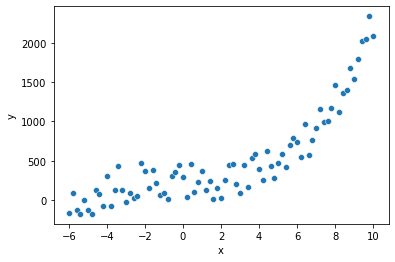

In [4]:
# scatterplot of the given data
sns.scatterplot(x='x',y='y',data=data)

In [5]:
X=data['x'].to_numpy() #features
Y=data['y'].to_numpy() #output
kfold = KFold(n_splits=10) #10 splits
trainX=[]
trainY=[]
testX=[]
testY=[]

In [6]:
#1. Partitioning the data in 10 folds and producing 10 different set of train and validation set
for train_index, test_index in kfold.split(X):
    trainX.append(X[train_index])
    testX.append(X[test_index])
    trainY.append(Y[train_index])
    testY.append(Y[test_index])

In [7]:
#2. Normalize training input and output sample using mean and standard deviation
stdTrainX=[]
stdTestX=[]
stdTrainY=[]
stdTestY=[]
for i in range(10):
    stdTrainX.append((trainX[i]-np.mean(trainX[i],axis=0))/np.std(trainX[i],axis=0))
    stdTrainY.append((trainY[i]-np.mean(trainY[i],axis=0))/np.std(trainY[i],axis=0))
    stdTestX.append(testX[i])
    stdTestY.append(testY[i])

In [8]:
# compute mean squared error
def computeCost(X,y,weights):
    n = len(y);
    predictions = X.dot(weights)
    sq_err = (predictions-y)**2;
    return np.mean(sq_err)

In [9]:
# compute standard deviation of error
def computeStdCost(X,y,weights):
    n = len(y);
    predictions = X.dot(weights)
    sq_err = (predictions-y)**2;
    return np.std(sq_err)

In [10]:
# compute training weights
def computeModels(degree):
    model_weights=[]
    for ind in range(10):
        polyFeat = PolynomialFeatures(degree=degree)
        Xtrain = polyFeat.fit_transform(stdTrainX[ind].reshape(-1,1))
        cmodel = Ridge(fit_intercept=False,alpha=0.5)
        cmodel.fit(Xtrain,stdTrainY[ind])
        weight=[]
        for item in (cmodel.coef_):
            weight.append(item)
        model_weights.append(weight)
    return model_weights

In [11]:
# store mean, std of training and test error over 10 folds for errorbar plot
mean_training_err = [] 
mean_test_err = []
std_training_err =[]
std_test_err =[]

In [12]:
# prints mean and standard deviation of training
def computeErrorTerms(degree,nthModel,weight_list):
    polyFeat = PolynomialFeatures(degree=degree)
    train_mean_err_list=[]
    test_mean_err_list=[]
    train_std_err_list=[]
    test_std_err_list=[]
    
    for i in range(10):
        weights = np.array(weight_list[i]).reshape((degree+1,1))
        Xtrain = polyFeat.fit_transform(stdTrainX[i].reshape(-1,1))
        Xtest = polyFeat.transform(stdTestX[i].reshape(-1,1))
        
        train_err = computeCost(Xtrain,stdTrainY[i].reshape(len(stdTrainY[i]),1),weights)
        test_err = computeCost(Xtest,stdTestY[i].reshape(len(stdTestY[i]),1),weights)
        train_std_err = computeStdCost(Xtrain,stdTrainY[i].reshape(len(stdTrainY[i]),1),weights)
        test_std_err = computeCost(Xtest,stdTestY[i].reshape(len(stdTestY[i]),1),weights)
        
        train_mean_err_list.append(train_err)
        test_mean_err_list.append(test_err)
        train_std_err_list.append(train_std_err)
        test_std_err_list.append(test_std_err)
        
        print("for ",str(i+1)," fold - ")
        print("mean train error : ",train_err)
        print("std train error : ",train_std_err)
        print("\n")
    
    mean_training_err.append(np.mean(train_mean_err_list))
    std_training_err.append(np.std(train_std_err_list)/np.sqrt(10))
    mean_test_err.append(np.mean(test_mean_err_list))
    std_test_err.append(np.std(test_std_err_list)/np.sqrt(10))
    min_val = min(train_mean_err_list)
    min_ind = train_mean_err_list.index(min_val)
    
    if(degree==1):
        global min_id_deg1 # min index for degree 1
        min_id_deg1 = min_ind
        global min_val_deg1 #min value for degree 1
        min_val_deg1 = min_val
    elif(degree==3):
        global min_id_deg3 #min index for degree 3
        min_id_deg3 = min_ind
        global min_val_deg3 #min value for degree 3
        min_val_deg3=min_val
    elif(degree==5):
        global min_id_deg5 #min index for degree 5
        min_id_deg5 = min_ind
        global min_val_deg5 #min value for degree 5
        min_val_deg5 = min_val
    else:
        global min_id_deg50 #min index for degree 50
        min_id_deg50 = min_ind
        global min_val_deg50 #min value for degree 50
        min_val_deg50 = min_val
    

In [13]:
# to plot minimum training error output
def plotTrainingOutput(degree,min_ind,min_val,modelNo,weight_list):
    polyFeat = PolynomialFeatures(degree=degree)
    print("min training error ",min_val," at index",min_ind+1,"for Hypothesis ",modelNo)
    plt.scatter(stdTrainX[min_ind],stdTrainY[min_ind])
    X_Poly = polyFeat.fit_transform(stdTrainX[min_ind].reshape(-1,1))
    pred = X_Poly.dot(np.array(weight_list[min_ind]).reshape(degree+1,1))
    plt.plot(stdTrainX[min_ind],pred,'r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Hypothesis "+str(modelNo+1))

In [14]:
#3a. weights for degree 1
weight_list1 = computeModels(1)
print(weight_list1)

[[2.098351907466123e-16, 0.8205396918814147], [3.7639562445626374e-17, 0.8322882993905536], [-9.805043828397366e-17, 0.8317082934430555], [1.971823053718524e-16, 0.8293885337037286], [9.221778980270939e-17, 0.8418107595807812], [-2.5592074694222342e-17, 0.8471349667155518], [-1.3737401920462928e-16, 0.8527197745023836], [-5.437827059388521e-17, 0.8445963089030009], [-1.850451476667785e-16, 0.805848940977048], [2.8314650519897164e-17, 0.8191735489438112]]


In [15]:
#3b. weights for degree 3
weight_list3 = computeModels(3)
print(weight_list3)

[[-0.4986723543863928, 0.3556065751087854, 0.5021353568474096, 0.2601568251028362], [-0.4697384821609264, 0.3315751717688119, 0.5342198352305769, 0.3040535114908006], [-0.4615156834116412, 0.3226959220106767, 0.5337408883360194, 0.33234549210861386], [-0.4731155616368855, 0.2916253358563741, 0.5275153080834636, 0.35829154545044534], [-0.45413886590875474, 0.23846233284532498, 0.4749964071717988, 0.3851166093376253], [-0.4785448760199233, 0.2047426294340564, 0.45952112580655, 0.37778693785182843], [-0.4549228593566059, 0.1658074062974065, 0.4024983432406892, 0.36245391959699486], [-0.4104840372645606, 0.15855363454422025, 0.34423361496823107, 0.3256968888748668], [-0.36074447327357345, 0.12579759918876637, 0.30353501624116375, 0.31030987468974547], [-0.3274445625299724, 0.21208811448826634, 0.3296873335062054, 0.33966475333931556]]


In [16]:
#3c. weights for degree 5
weight_list5 = computeModels(5)
print(weight_list5)

[[-0.47114625786076364, 0.4163736572106589, 0.4071756693257996, 0.16059061985174133, 0.03736652233415832, 0.03061206058417749], [-0.4300197373405329, 0.33220866889584133, 0.3923426136749725, 0.29007126403888017, 0.05471005527428463, 0.010824054395813831], [-0.4197478304241017, 0.3497921912728126, 0.36150797106870675, 0.28347613353672213, 0.07273410797430653, 0.020772218763522133], [-0.43868020357581144, 0.3314670712999256, 0.3896528861908301, 0.2794573705028934, 0.06098571712491839, 0.02962000597469528], [-0.37841546520899694, 0.23568556093387918, 0.23258958633375887, 0.37545012421200635, 0.10190668422708163, 0.006437388725721252], [-0.4352680091874313, 0.23970718009834818, 0.3247576711838793, 0.32586263324310144, 0.055932382174640645, 0.015282668828629995], [-0.4210617893378609, 0.19304581619792582, 0.28346132515786865, 0.3297464125557926, 0.04990538109753623, 0.0066707698171124315], [-0.3830954779069016, 0.17483372933293767, 0.23656423525058204, 0.3009722408208176, 0.0431983382481631

In [17]:
#3d. weights for degree 50
weight_list50 = computeModels(50)
print(weight_list50)

[[-0.45971097335580285, 0.4258422753774078, 0.33246247219597114, 0.06633843374313772, 0.10431415511650768, 0.08467490726923628, -0.04198234260256782, 0.08054249895023553, -0.081518364114523, 0.05195288365213646, -0.058618361048476175, 0.014466499341948193, -0.008749943603430054, -0.019744959087072404, 0.0434672514166565, -0.04136469938077411, 0.07989361474105887, -0.04530572123384373, 0.08813808121728191, -0.031545663696508255, 0.06308526263166092, -0.005928371101406825, 0.011247670443209075, 0.01994143332542302, -0.047395713837000746, 0.0330130927089442, -0.08274961448853903, 0.024743676564528035, -0.06827258719357204, -0.0009040196254921698, -0.0035062965829197037, -0.0248475266348116, 0.068564194437629, -0.023634735635548708, 0.0764103161976771, 0.005559328887256131, -0.008294685855474371, 0.027525754176122564, -0.08980067490014013, 0.0018181926429867812, -0.01620834766420945, -0.03031836332158737, 0.10772945267199277, 0.023053099030566786, -0.07834325794516683, -0.00788340757394107

In [18]:
#4a. print mean and std of training errors for degree 1
computeErrorTerms(1,0,weight_list1)

for  1  fold - 
mean train error :  0.3173634281311414
std train error :  0.46722178726327335


for  2  fold - 
mean train error :  0.2978070933646691
std train error :  0.45758361918739154


for  3  fold - 
mean train error :  0.2987854422155474
std train error :  0.46475608230953985


for  4  fold - 
mean train error :  0.3026915733136667
std train error :  0.4686203424086316


for  5  fold - 
mean train error :  0.28164717443833004
std train error :  0.45787837957724237


for  6  fold - 
mean train error :  0.27253169540301747
std train error :  0.427887455954049


for  7  fold - 
mean train error :  0.2629082873530506
std train error :  0.4038434689292142


for  8  fold - 
mean train error :  0.2768852540968435
std train error :  0.4081311322647452


for  9  fold - 
mean train error :  0.34171169644022714
std train error :  0.5506481037517281


for  10  fold - 
mean train error :  0.3197622952958812
std train error :  0.45194079462826425




In [19]:
#4a. print mean and std of training errors for degree 3
computeErrorTerms(3,1,weight_list3)

for  1  fold - 
mean train error :  0.06846576573320416
std train error :  0.06131298229570573


for  2  fold - 
mean train error :  0.0599005557917604
std train error :  0.05291834191381451


for  3  fold - 
mean train error :  0.059559703440642216
std train error :  0.05521575438615887


for  4  fold - 
mean train error :  0.05833774969809432
std train error :  0.05568846585011868


for  5  fold - 
mean train error :  0.06160590771156087
std train error :  0.05523900848697775


for  6  fold - 
mean train error :  0.05833620004806693
std train error :  0.05537128919349858


for  7  fold - 
mean train error :  0.05920464513816227
std train error :  0.05259068515681807


for  8  fold - 
mean train error :  0.058395625463525086
std train error :  0.05437552135515106


for  9  fold - 
mean train error :  0.06955170657719156
std train error :  0.06178602326426724


for  10  fold - 
mean train error :  0.15900540367059582
std train error :  0.14709226212109458




In [20]:
#4a. print mean and std of training errors for degree 5
computeErrorTerms(5,2,weight_list5)

for  1  fold - 
mean train error :  0.06803278613808837
std train error :  0.06077984397806966


for  2  fold - 
mean train error :  0.05954639854837798
std train error :  0.05424481706826555


for  3  fold - 
mean train error :  0.058790580545025055
std train error :  0.05741784518252396


for  4  fold - 
mean train error :  0.05802669197589767
std train error :  0.05776598105083478


for  5  fold - 
mean train error :  0.05954160542195669
std train error :  0.059131252761170115


for  6  fold - 
mean train error :  0.058228274527723625
std train error :  0.05724902811086224


for  7  fold - 
mean train error :  0.05886097175763352
std train error :  0.05492317447834206


for  8  fold - 
mean train error :  0.058030981596417223
std train error :  0.0565181088039416


for  9  fold - 
mean train error :  0.06893812190354597
std train error :  0.06363102202192379


for  10  fold - 
mean train error :  0.15827782399420545
std train error :  0.1489662057915591




In [21]:
#4a. print mean and std of training errors for degree 50
computeErrorTerms(50,3,weight_list50)

for  1  fold - 
mean train error :  0.049792956545812825
std train error :  0.05262410653572809


for  2  fold - 
mean train error :  0.04773913494215508
std train error :  0.05092722954255809


for  3  fold - 
mean train error :  0.049606082011965945
std train error :  0.05286226374497228


for  4  fold - 
mean train error :  0.049005610996644244
std train error :  0.05412012761730603


for  5  fold - 
mean train error :  0.05229643137043185
std train error :  0.05820156345829105


for  6  fold - 
mean train error :  0.050880706885124624
std train error :  0.05586930711307158


for  7  fold - 
mean train error :  0.05152603546181387
std train error :  0.05385391016696693


for  8  fold - 
mean train error :  0.05044394426376241
std train error :  0.05560243876556361


for  9  fold - 
mean train error :  0.058076804393101915
std train error :  0.06379151255184762


for  10  fold - 
mean train error :  0.13146986247354203
std train error :  0.14750021670726893




[0.2972093940052375, 0.07123632632728036, 0.07062742364088716, 0.05908375693443548]
[0.012306288263591812, 0.008686813334572068, 0.0086723455763895, 0.008811711568354383]


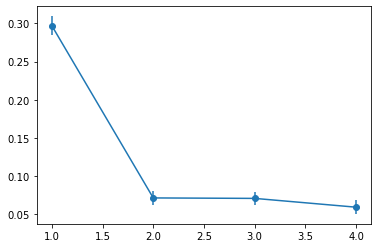

In [22]:
# 4a. Error bar plot for training 
ind=[1,2,3,4]
plt.errorbar(x=ind,y=mean_training_err,fmt='o',yerr=std_training_err, ls='-')
print(mean_training_err)
print(std_training_err)

[597330.903957491, 444572.0605701994, 1385995.943541703, 1.2002078041826508e+91]
[333242.7757357082, 234648.40468252232, 1178303.8557141812, 1.1386170973515765e+91]


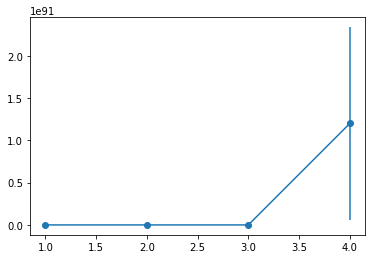

In [23]:
#4a. Error bar plot for test
ind=[1,2,3,4]
plt.errorbar(x=ind,y=mean_test_err,yerr=std_test_err ,fmt='o', ls='-')
print(mean_test_err)
print(std_test_err)

min training error  0.2629082873530506  at index 7 for Hypothesis  0


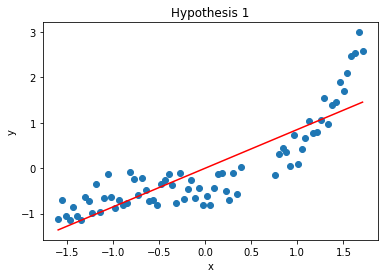

In [24]:
# 4b. for degree 1 plot
plotTrainingOutput(1,min_id_deg1,min_val_deg1,0,weight_list1)


min training error  0.05833620004806693  at index 6 for Hypothesis  1


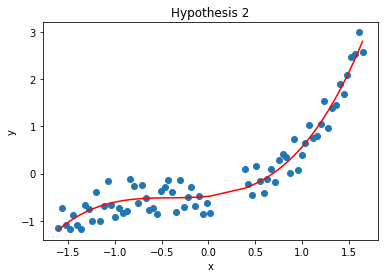

In [25]:
#4b. for degree 3 plot
plotTrainingOutput(3,min_id_deg3,min_val_deg3,1,weight_list3)

min training error  0.05802669197589767  at index 4 for Hypothesis  2


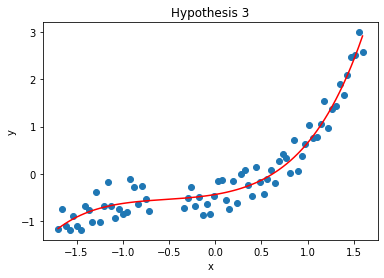

In [26]:
#4b. for degree 5 plot
plotTrainingOutput(5,min_id_deg5,min_val_deg5,2,weight_list5)

min training error  0.04773913494215508  at index 2 for Hypothesis  3


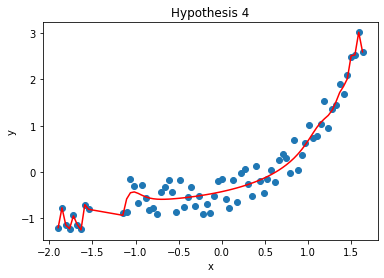

In [27]:
#4b for degree 50 plot
plotTrainingOutput(50,min_id_deg50,min_val_deg50,3,weight_list50)

 # 5) Hypothesis2 with degree 3 is better than other hypotheses. 
* hypothesis 1 with linear model underfits the training data (simple model)
* hypothesis 3 with degree 5 starts overfitting the training data (complex model)
* hypothesis 4 with degree 50 exactly overfits the training data (extremely complex model)

* Test Error Drops in Hypothesis2 with degree 3 from Hypothesis1 with degree 1, also, Test error increases largely in  Hypotheses3 with degree 5 and Hypotheses4 with degree 50. 
* Therefore, I will choose Hypothesis2